<a href="https://colab.research.google.com/github/yusuku/DepthEstimationFrom360/blob/main/RunOnnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


In [2]:
import onnx
onnx_model = onnx.load("SliceNet.onnx")
onnx.checker.check_model(onnx_model)

In [4]:
import onnxruntime as ort
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms


torch.Size([1, 3, 512, 1024])


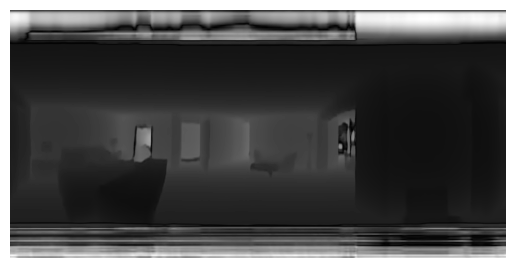

In [5]:
# 1. 画像を読み込む
image_path = "/content/001ad2ad14234e06b2d996d71bb96fc4_color.png"  # 画像のパスを指定
image = Image.open(image_path).convert('RGB')  # RGB形式に変換

# 2. リサイズとTensor変換を定義
transform = transforms.Compose([
    transforms.Resize((512, 1024)),  # 高さ512, 幅1024にリサイズ
    transforms.ToTensor()  # [0, 255] → [0.0, 1.0]に正規化
]) # [0, 255] → [0.0, 1.0]に正規化 & CHW形式に変換

# 3. 画像をTensorに変換
image_tensor = transform(image)

# 4. 次元を(1, 512, 1024)に変形
image_tensor = image_tensor.unsqueeze(0)

print(image_tensor.shape)  # 例: torch.Size([3, H, W])
x = image_tensor
ort_sess = ort.InferenceSession('SliceNet.onnx')
outputs = ort_sess.run(None, {'input': x.numpy()})
image_to_display=outputs[0].squeeze(0)

plt.imshow(image_to_display, cmap='gray')
plt.axis('off')  # 軸を非表示
plt.show()